# Least Squares

Natasha Watkins

In [75]:
from scipy.linalg import norm
import numpy as np
import scipy
import matplotlib.pyplot as plt
import cmath

### Problem 1

In [76]:
def solve(A, b):
    
    Q, R = scipy.linalg.qr(A, mode='economic')
    n = R.shape[0]
    y = Q.T @ b    
    x = scipy.linalg.solve_triangular(R, Q.T @ b)
        
    return x

In [77]:
A = np.random.random((5, 5))
b = np.ones(5)

In [78]:
solve(A, b)

array([ 0.00561494, -0.38836701, -0.08814959,  1.48504149,  0.86624185])

In [9]:
scipy.linalg.solve(A, b)

array([ 1.52523412, -0.45129405,  0.27986856, -0.19465211,  0.63431297])

### Problem 2

In [10]:
housing = np.load('housing.npy')
b = housing[:, 1]
A = np.array([housing[:, 0], np.ones(len(housing))]).T

In [11]:
β = solve(A, b)

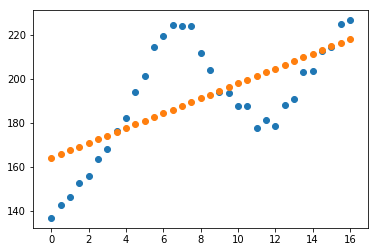

In [12]:
y = A @ β  # Least squares line
x = housing[:, 0]
plt.scatter(x, housing[:, 1])
plt.scatter(x, y)
plt.show()

### Problem 3

In [13]:
def plot_p(degree, ax=None):
    
    if ax == None:
        fig, ax = plt.subplots()
    
    A = np.vander(housing[:, 0], degree+1)
    β = solve(A, b)
    y = A @ β
    ax.scatter(x, y)
    ax.scatter(x, housing[:, 1])
    ax.set(title=f'Polynomial of degree {degree}')
    
    return ax

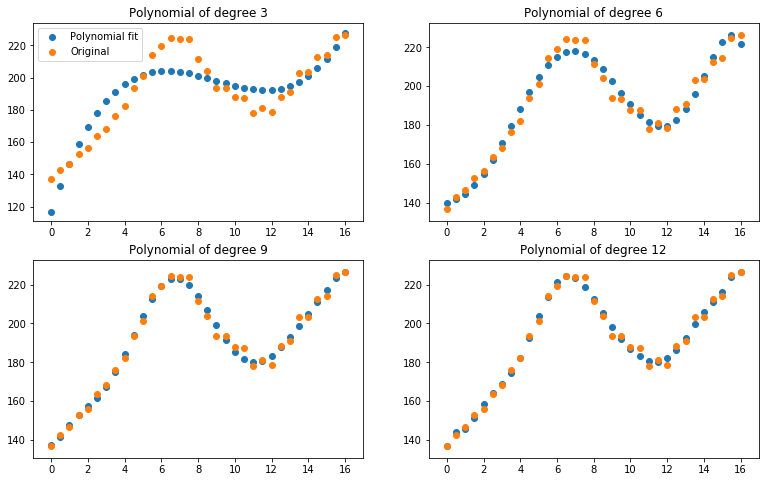

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(13, 8))

for ax, d in zip(axes.flatten(), (3, 6, 9, 12)):
    plot_p(d, ax=ax)
    
axes[0, 0].legend(['Polynomial fit', 'Original'])
plt.show()

Using `np.polyfit()`

In [15]:
def plot_poly(degree, ax=None):
    
    if ax == None:
        fig, ax = plt.subplots()
    
    A = np.vander(housing[:, 0], degree+1)
    β = np.polyfit(housing[:, 0], housing[:, 1], degree)
    y = A @ β
    ax.scatter(x, y)
    ax.scatter(x, housing[:, 1])
    ax.set(title=f'Polynomial of degree {degree}')
    
    return ax

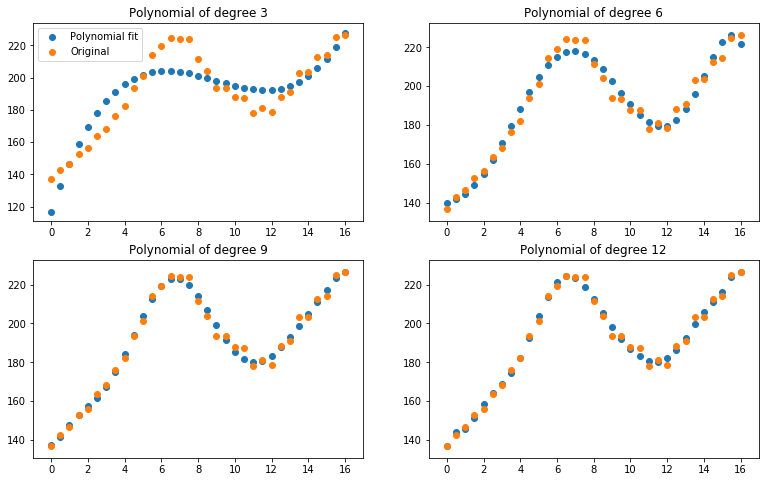

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(13, 8))

for ax, d in zip(axes.flatten(), (3, 6, 9, 12)):
    plot_poly(d, ax=ax)
    
axes[0, 0].legend(['Polynomial fit', 'Original'])
plt.show()

### Problem 4

In [17]:
ellipse = np.load('ellipse.npy')
x = ellipse[:, 0]
y = ellipse[:, 1]

In [18]:
A = np.array([x**2, x, x*y, y, y**2]).T
b = np.ones(len(A))
β = solve(A, b)

In [19]:
def plot_ellipse(a, b, c, d, e):
    """Plot an ellipse of the form ax^2 + bx + cxy + dy + ey^2 = 1."""
    θ = np.linspace(0, 2*np.pi, 200)
    cos_t, sin_t = np.cos(θ), np.sin(θ)
    A = a * (cos_t**2) + c*cos_t*sin_t + e*(sin_t**2)
    B = b * cos_t + d * sin_t
    r = (-B + np.sqrt(B**2 + 4*A)) / (2 * A)
    plt.plot(r * cos_t, r * sin_t, lw=2)
    plt.gca().set_aspect("equal", "datalim")

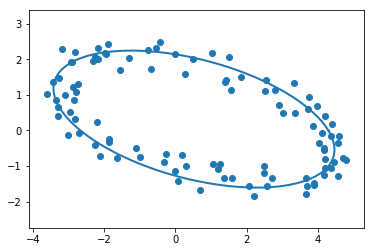

In [20]:
plot_ellipse(*β)
plt.scatter(x, y)
plt.show()

### Problem 5

In [21]:
A = np.random.random((10, 10))

In [22]:
def power_method(A, max_iter=500, tol=1e-8):
    m, n = A.shape
    x = np.random.random(m)
    x = x / norm(x)
    k = 0
    diff = 1e3
    while (k < max_iter) & (diff > tol):
        x_new = A @ x
        x_new = x_new / norm(x_new)
        diff = norm(x_new - x)
        x = x_new
        k = k + 1
    return x.T @ A @ x, x

In [23]:
λ, x = power_method(A)
λ

4.078560465784599

In [24]:
A @ x

array([1.12082943, 1.31364857, 1.33417968, 1.54455875, 1.04008306,
       1.49682971, 1.07554455, 0.69639505, 1.22835454, 1.73612736])

In [25]:
λ * x

array([1.12082943, 1.31364856, 1.33417968, 1.54455875, 1.04008306,
       1.49682971, 1.07554455, 0.69639505, 1.22835454, 1.73612736])

In [26]:
np.max(scipy.linalg.eigvals(A))

(4.078560465709323+0j)

### Problem 6

In [72]:
def qr_algorithm(A, N=1000, tol=1e-8):
    
    m, n = A.shape
    S = scipy.linalg.hessenberg(A)
    
    for k in range(N-1):
        Q, R = scipy.linalg.qr(S)
        S = R @ Q
                        
    eigs = []
    i = 0
        
    while i < n:        
        if (S[i, i] == np.diag(S)[-1]):
            eigs.append(S[i, i])
        elif S[i+1, i] < tol:
            eigs.append(S[i, i])
        else:
            a, b, c, d = S[i:i+2, i:i+2].flatten()  # Get elements of block matrix
            λ_1 = (a + d) + (cmath.sqrt((a + d)**2 - 4 * (a * d - b * c))) / 2
            λ_2 = (a + d) - (cmath.sqrt((a + d)**2 - 4 * (a * d - b * c))) / 2
            eigs.extend([λ_1, λ_2])
            i = i + 1
        i = i + 1
            
    return eigs

In [73]:
A = np.random.random((10, 10))

In [74]:
qr_algorithm(A + A.T)

[10.510040143586782,
 1.9200859876193201,
 1.7743175199011094,
 -1.375953818756658,
 -1.0443361423876818,
 0.8882567447207834,
 0.6444816050446576,
 -0.431061259134564,
 0.3493398091150566,
 -0.19281762424681273]

In [71]:
scipy.linalg.eigvals(A + A.T)

array([10.08299307+0.j, -2.09210363+0.j,  1.45252953+0.j,  1.07829856+0.j,
        1.29503873+0.j, -1.45112044+0.j,  0.19748456+0.j, -0.21792187+0.j,
       -0.47889736+0.j, -0.85309594+0.j])